# Using LR to predict Beer consumption

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Datasets/Modified_Beer_Data.csv')
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.0,23.0,32.0,0.0,0.0,25.461
1,2015-01-02,27.0,24.0,33.0,0.0,0.0,28.972
2,2015-01-03,24.0,22.0,29.0,0.0,1.0,30.814
3,2015-01-04,23.0,21.0,28.0,1.0,1.0,29.799
4,2015-01-05,23.0,21.0,28.0,0.0,0.0,28.900


In [4]:
df.isna().any()

Data                           True
Temperatura Media (C)          True
Temperatura Minima (C)         True
Temperatura Maxima (C)         True
Precipitacao (mm)              True
Final de Semana                True
Consumo de cerveja (litros)    True
dtype: bool

# Handling NaN values

In [5]:
df['Temperatura Maxima (C)'] = df['Temperatura Maxima (C)'].fillna(value=df['Temperatura Maxima (C)'].mean())
df['Temperatura Media (C)'] = df['Temperatura Media (C)'].fillna(value=df['Temperatura Media (C)'].mean())
df['Temperatura Minima (C)'] = df['Temperatura Minima (C)'].fillna(value=df['Temperatura Minima (C)'].mean())
df['Precipitacao (mm)'] = df['Precipitacao (mm)'].fillna(value=df['Precipitacao (mm)'].mean())
df['Final de Semana'] = df['Final de Semana'].fillna(value=df['Final de Semana'].mean())
df['Consumo de cerveja (litros)'] = df['Consumo de cerveja (litros)'].fillna(value=df['Consumo de cerveja (litros)'].mean())


In [6]:
df.isna().any()

Data                            True
Temperatura Media (C)          False
Temperatura Minima (C)         False
Temperatura Maxima (C)         False
Precipitacao (mm)              False
Final de Semana                False
Consumo de cerveja (litros)    False
dtype: bool

# Train - Test Split

In [7]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
model = LinearRegression()


In [10]:
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test)

In [12]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

Mean Absolute Error: 0.8324951061798456
Mean Squared Error: 2.2040403007218905
R-squared Score: 0.704918628199082


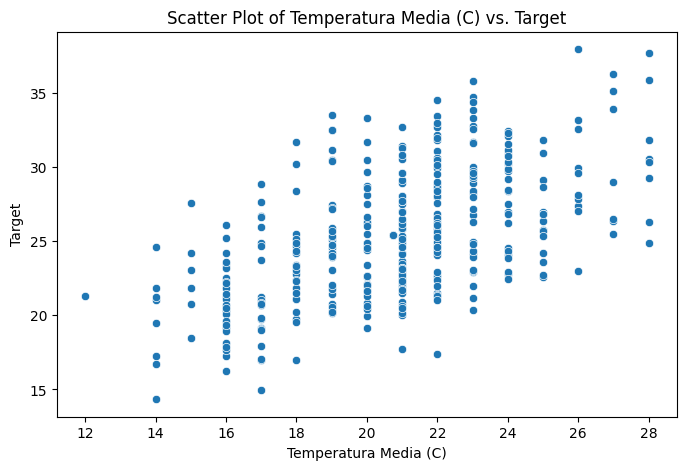

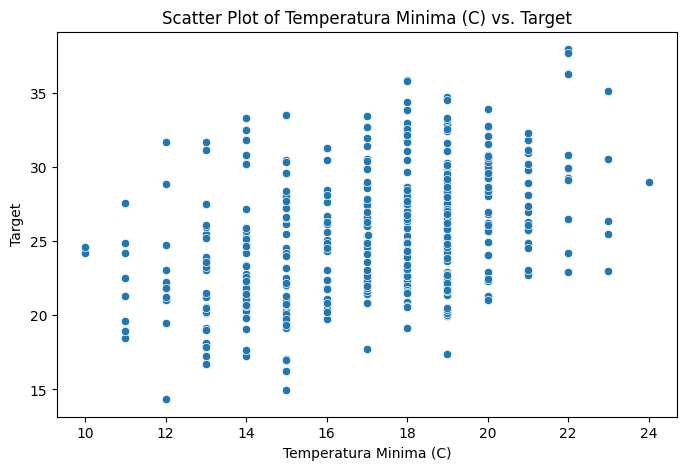

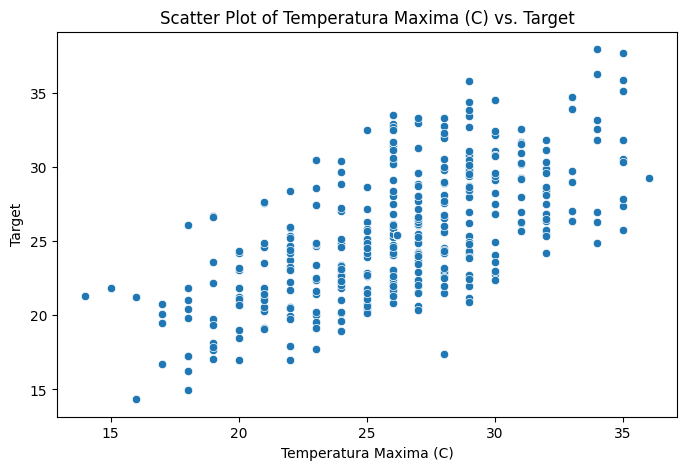

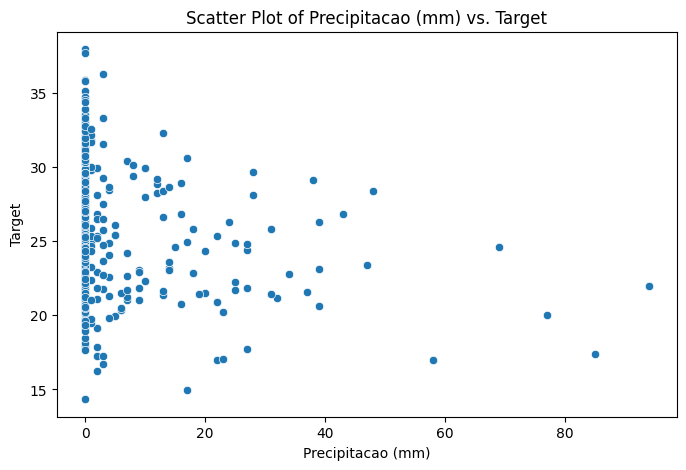

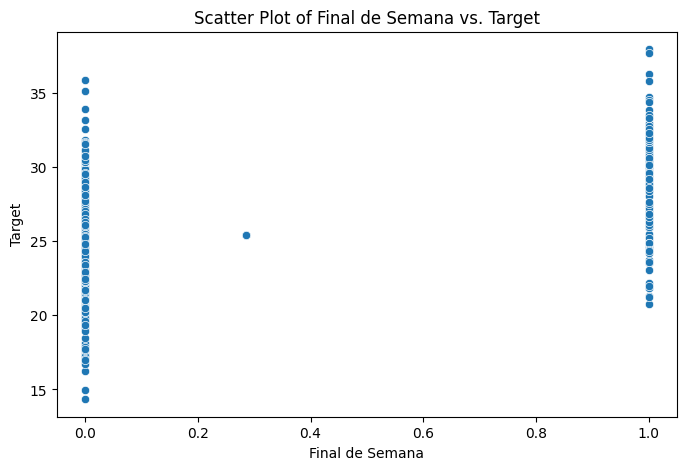

In [16]:
import seaborn as sns

# Assuming X is a DataFrame with multiple columns (features) and y is a Series or a single-column DataFrame
for column in X.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=X[column], y=y)
    plt.title(f'Scatter Plot of {column} vs. Target')
    plt.xlabel(column)
    plt.ylabel('Target')
    plt.show()